In [1]:
import cv2
from matplotlib import pyplot as plt

def crop_img_target(img, crop_length, target_x, target_y):
    ## img shape info
    img_h, img_w, _ = img.shape
    crop_length_half = int(crop_length/2)

    ## target location(準心位置) + 防止超出照片
    border_h = img_h/2 - crop_length_half
    border_w = img_w/2 - crop_length_half

    aim_y = int(img_h - crop_length_half if (target_y > border_h) else (
                crop_length_half if (abs(target_y) > border_h) else img_h/2 + target_y
            )) # 上界 -> 下界 -> 正常狀況
    aim_x = int(img_w - crop_length_half if (target_x > border_w) else (
                crop_length_half if (abs(target_x) > border_w) else img_w/2 + target_x
            )) # 上界 -> 下界 -> 正常狀況

    ## crop image with target
    crop_h_lower, crop_h_upper = int(aim_y - crop_length_half), int(aim_y + crop_length_half)
    crop_w_lower, crop_w_upper = int(aim_x - crop_length_half), int(aim_x + crop_length_half)

    crop_img = img[crop_h_lower:crop_h_upper, crop_w_lower:crop_w_upper]  


    return crop_img

範例: sunhemp

In [12]:
img1_path = 'image/0d9eac13-87b6-4449-98cb-59d3ccaedbc3.jpg'
img2_path = 'image/2a23c0c3-b2c2-46dc-8a5e-923a196bee99.jpg'

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# 將 BGR 圖片轉為 RGB 圖片
img1 = img1[:,:,::-1]
img2 = img2[:,:,::-1]

<Figure size 640x480 with 0 Axes>

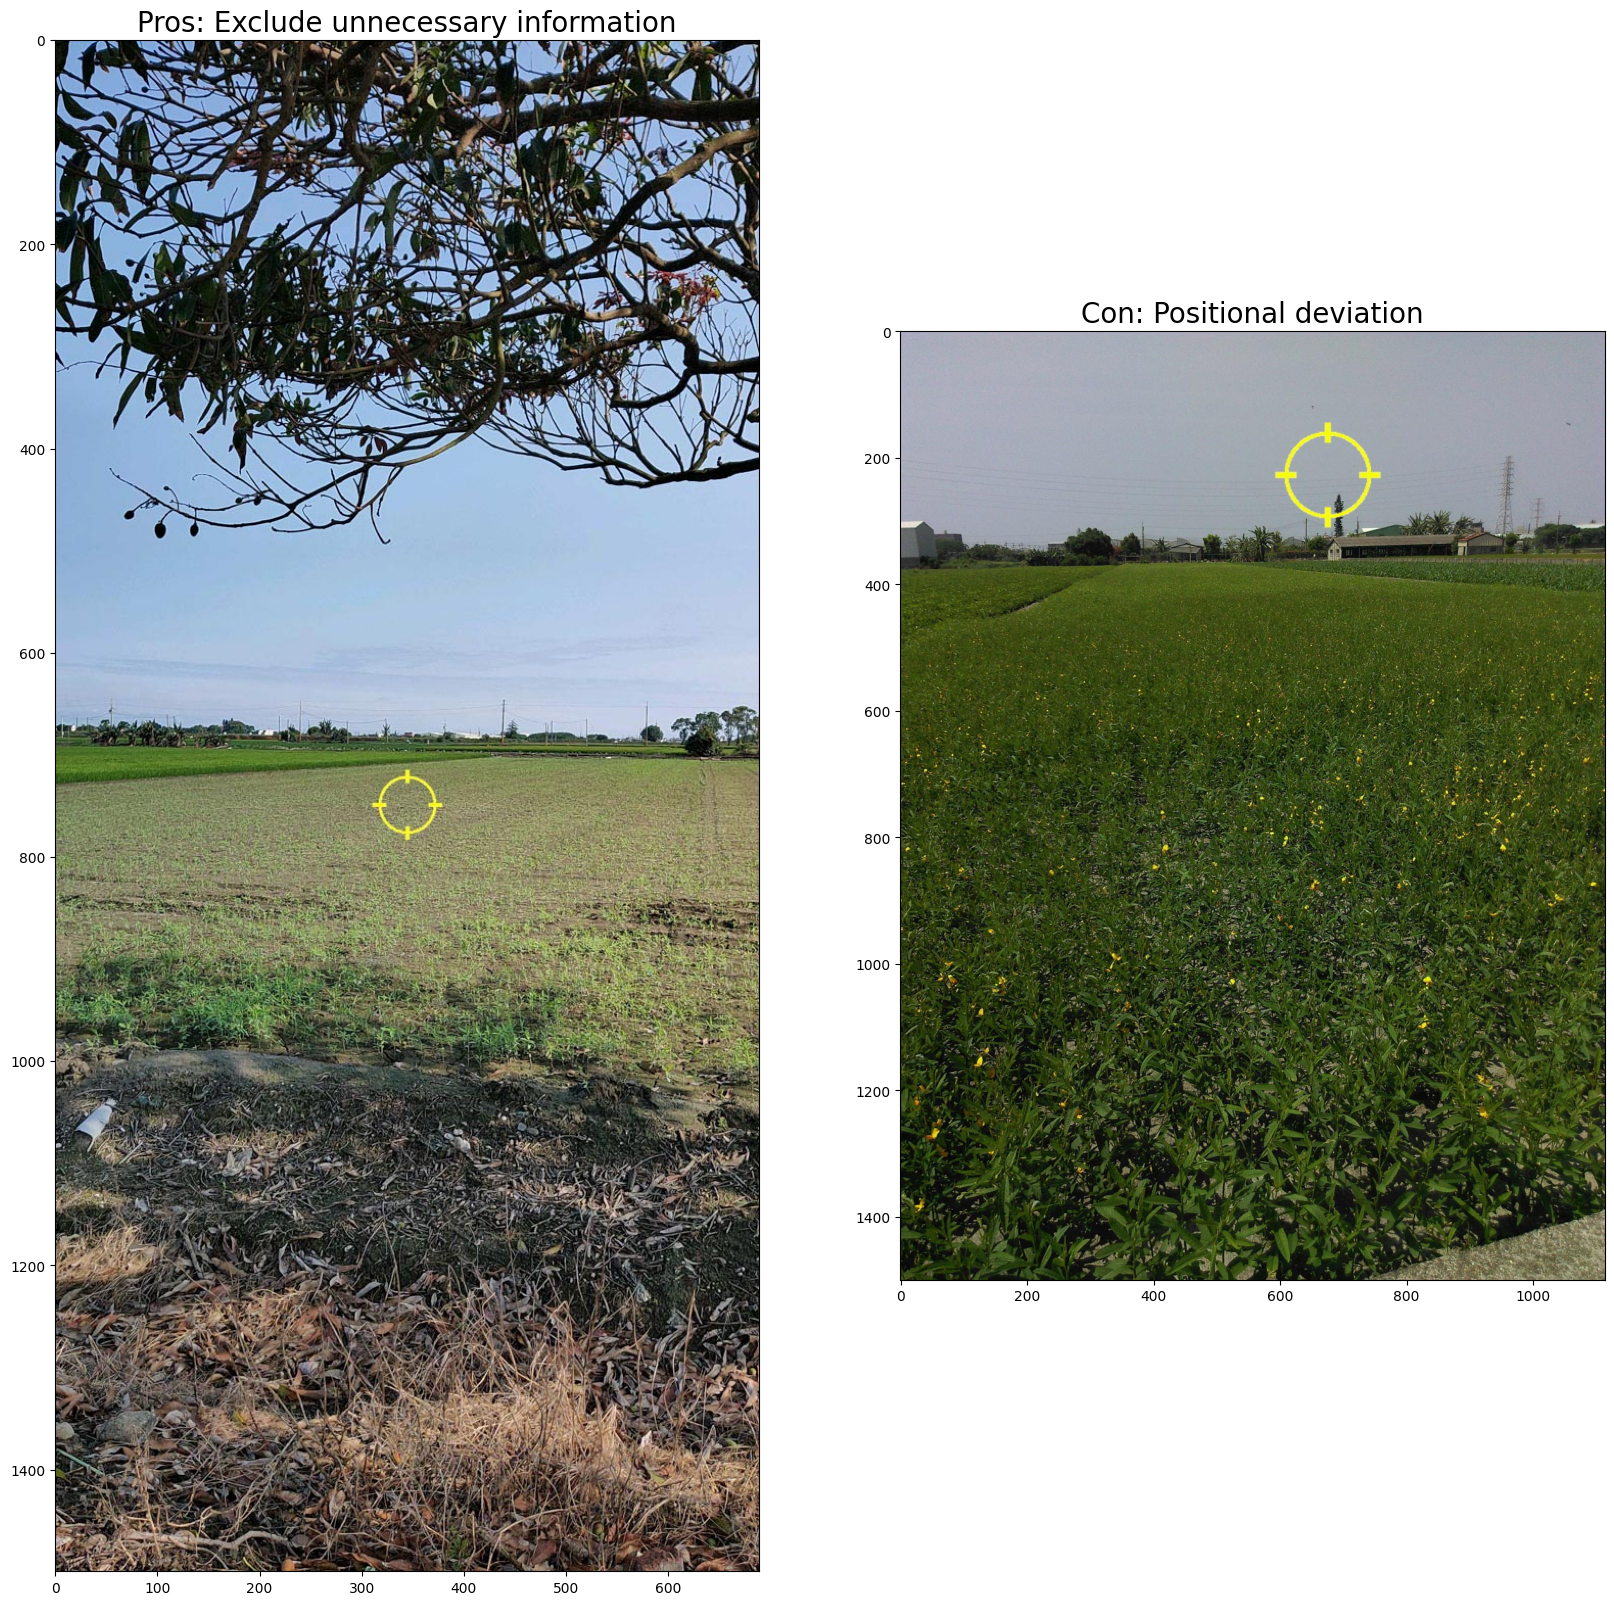

In [26]:
plt.clf()
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[1].imshow(img1) 
ax[0].imshow(img2) 

ax[1].set_title('Con: Positional deviation', fontsize=20)
ax[0].set_title('Pros: Exclude unnecessary information', fontsize=20)

plt.savefig('output/target_Pros-and-cons.png')
plt.show()

In [16]:
img1_path = 'image/2a23c0c3-b2c2-46dc-8a5e-923a196bee99.jpg'

img = cv2.imread(img1_path)

# 將 BGR 圖片轉為 RGB 圖片
img = img[:,:,::-1]

(-0.5, 689.5, 1499.5, -0.5)

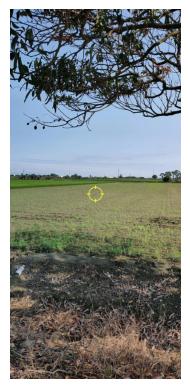

In [25]:
plt.clf()
plt.imshow(img) 
plt.axis('off')

In [18]:
img_c224 = crop_img_target(img, 224, 0, 0)
img_r224 = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

img_c690 = crop_img_target(img, 690, 0, 0)
img_c690_r224 = cv2.resize(img_c690, (224, 224), interpolation=cv2.INTER_AREA)

(-0.5, 223.5, 223.5, -0.5)

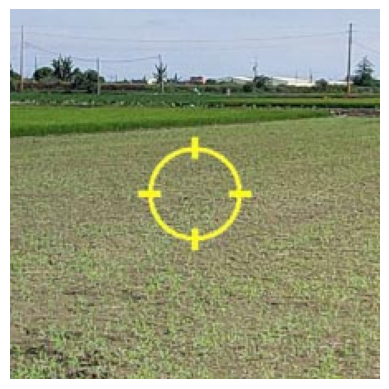

In [26]:
plt.clf()
plt.imshow(img_c224) 
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

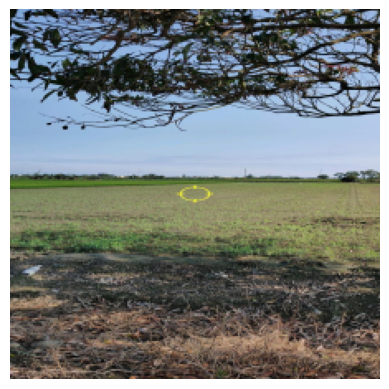

In [27]:
plt.clf()
plt.imshow(img_r224) 
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

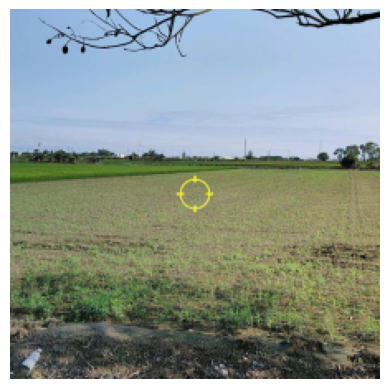

In [29]:
plt.clf()
plt.imshow(img_c690_r224) 
plt.axis('off')